<a href="https://colab.research.google.com/github/awamay/car_price_predictor/blob/master/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/awamay/car_price_prediction.git

Cloning into 'car_price_prediction'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("car_price_prediction/train-data.csv")
testdata = pd.read_csv("car_price_prediction/test-data.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [ ]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
x = data.iloc[:,1:]
x.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
x.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
x.shape

(6019, 13)

In [ ]:
x.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
#dropping new price column
x = x.drop("New_Price", axis=1)

In [ ]:
x.shape

(6019, 12)

In [ ]:
print("Shape of train data x before dropping any row:", x.shape)

x = x[x['Engine'].notna()]
print("Shape of train data x after dropping rows with NULL values in engine:", x.shape)

x = x[x['Power'].notna()]
print("Shape of train data x after dropping rows with NULL values in Power:", x.shape)

x = x[x['Seats'].notna()]
print("Shape of train data x after dropping rows with NULL values in Seats:", x.shape)


Shape of train data x before dropping any row: (6019, 12)
Shape of train data x after dropping rows with NULL values in engine: (5983, 12)
Shape of train data x after dropping rows with NULL values in Power: (5983, 12)
Shape of train data x after dropping rows with NULL values in Seats: (5977, 12)


In [ ]:
x.isnull().sum()
x = x.reset_index(drop=True)

In [ ]:
x['Company'] = x['Name'].str.split(' ').str[0]
x['Mileage'] = x['Mileage'].str.split(' ').str[0]
x['Engine'] = x['Engine'].str.split(' ').str[0]
x['Power'] = x['Power'].str.split(' ').str[0]

In [ ]:
x.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi


In [ ]:
x['Mileage'] = pd.to_numeric(x['Mileage'], errors='coerce')
x['Engine'] = pd.to_numeric(x['Engine'], errors='coerce')
x['Power'] = pd.to_numeric(x['Power'], errors='coerce')

In [ ]:
x = x[x['Power'].notna()]
print("Shape of train data x after dropping rows with NULL values in Power:", x.shape)


Shape of train data x after dropping rows with NULL values in Power: (5874, 13)


In [ ]:
x.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi


In [ ]:
x = x.reset_index(drop=True)
x = x.drop("Name", axis=1)

In [ ]:
###########visualization here###########

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5874 non-null   object 
 1   Year               5874 non-null   int64  
 2   Kilometers_Driven  5874 non-null   int64  
 3   Fuel_Type          5874 non-null   object 
 4   Transmission       5874 non-null   object 
 5   Owner_Type         5874 non-null   object 
 6   Mileage            5872 non-null   float64
 7   Engine             5874 non-null   int64  
 8   Power              5874 non-null   float64
 9   Seats              5874 non-null   float64
 10  Price              5874 non-null   float64
 11  Company            5874 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 550.8+ KB


(0.0, 160.0)

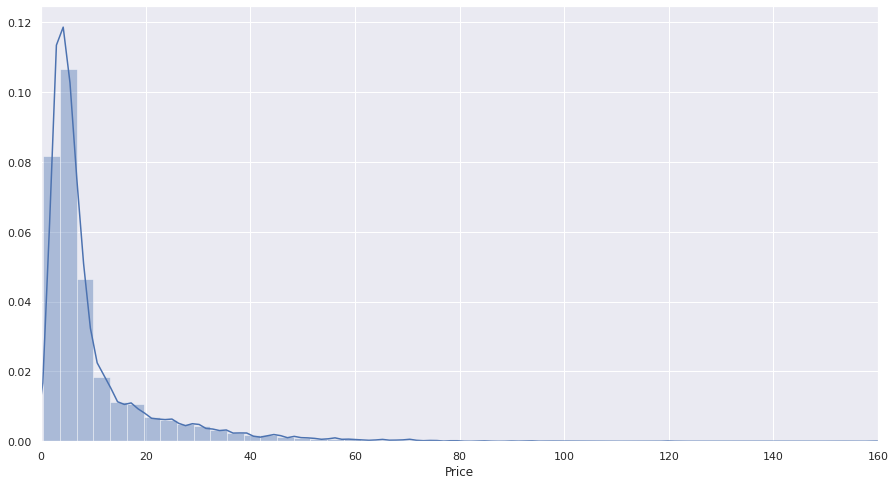

In [ ]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(x['Price'])
plt.xlim([0,160])

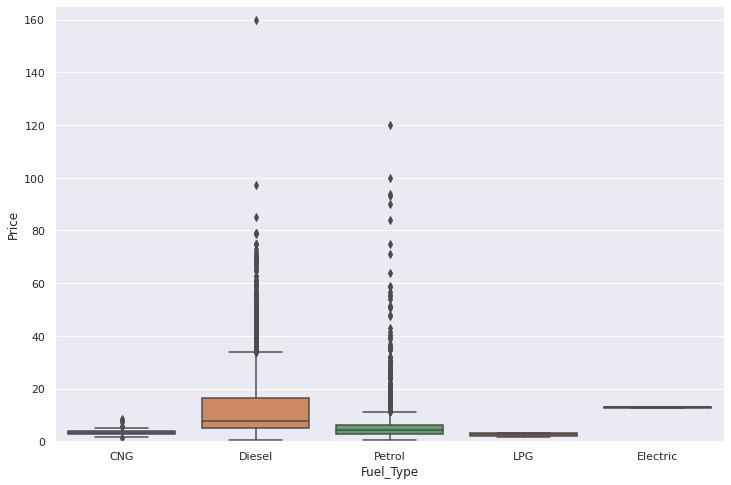

In [ ]:
x['Fuel_Type'].describe()


var = 'Fuel_Type'
data = pd.concat([x['Price'], x[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

In [ ]:
###
#Diesel->petrol->cng->lpg

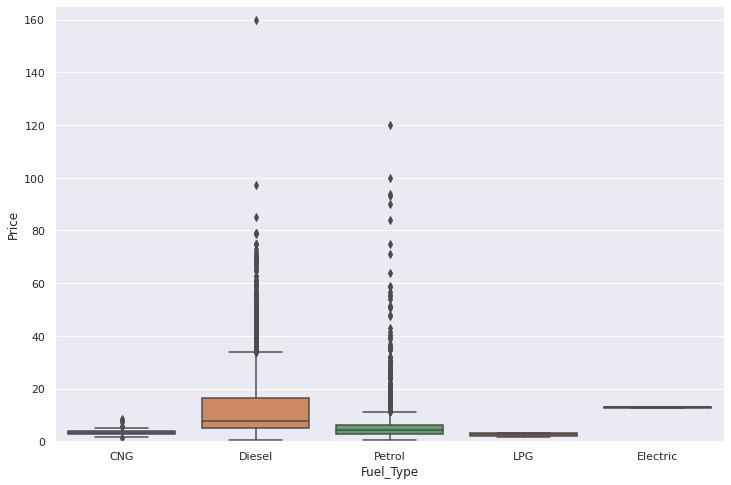

In [ ]:
x['Fuel_Type'].describe()


var = 'Fuel_Type'
data = pd.concat([x['Price'], x[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

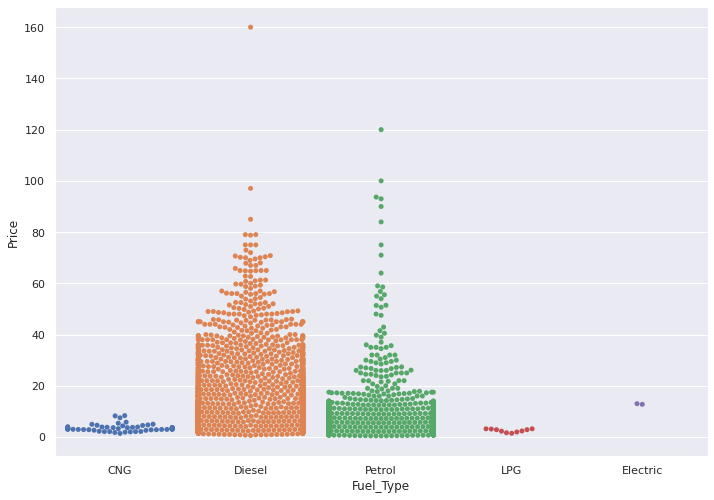

In [ ]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y = 'Price', data = x)


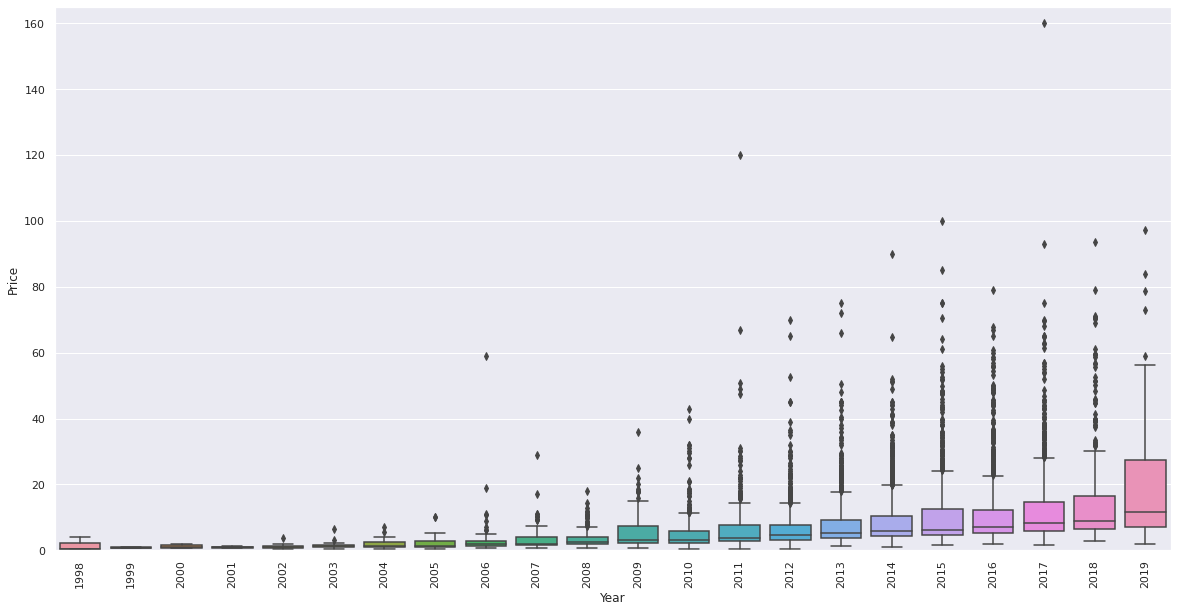

In [ ]:
##########year#####

var = 'Year'
data = pd.concat([x['Price'], x[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

In [ ]:
#newer cars ahve higher prices --obvio

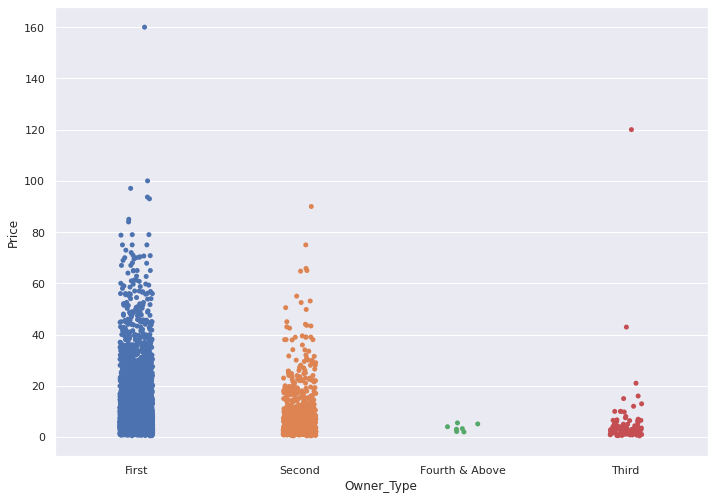

In [ ]:
######Owner type##########3
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y = 'Price', data = x)

<Figure size 1440x720 with 0 Axes>

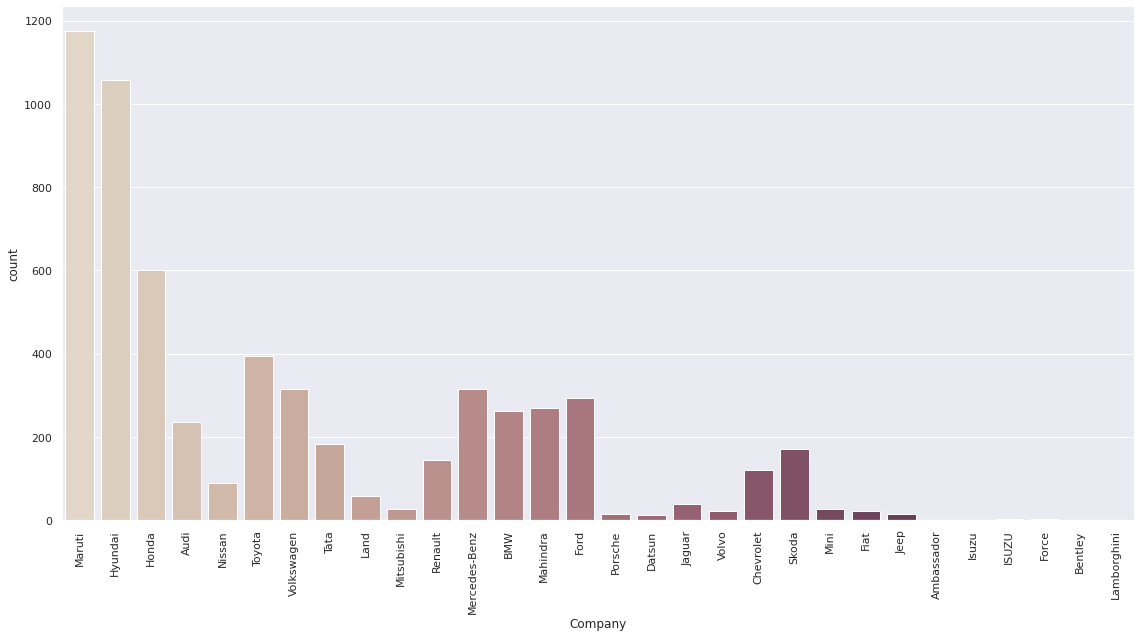

In [ ]:
######company###########
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=x);
plt.xticks(rotation=90);

In [ ]:
##maruti most popular followed by hyundai

working with categorical data

1. location
2. fuel type
3. Transmission
4. owner type
5. company

using label encoder and onehotencoder
 need to analyse if there is order among the categories
 

In [ ]:
######location###########

var = 'Location'
x[var].value_counts()

###mumabi has most number of cars equal to 776

Mumbai        776
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       477
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

<function matplotlib.pyplot.show>

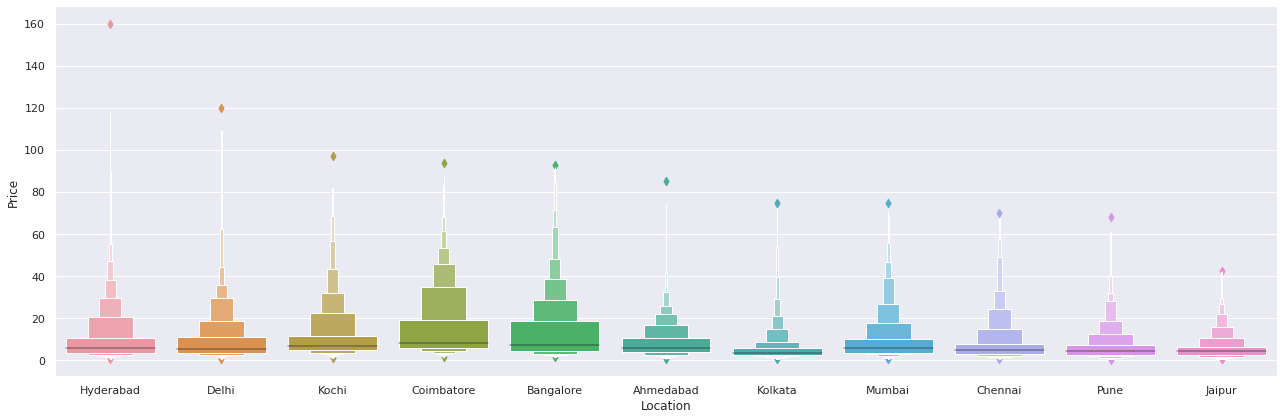

In [ ]:
#plot location vs price

sns.catplot(y='Price',x=var,data= x.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

###we see that there is order in location so we use onehotencoder

In [ ]:
##using onehotencoder in location using dummy variables
Location = x[[var]]
Location = pd.get_dummies(Location, drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


<function matplotlib.pyplot.show>

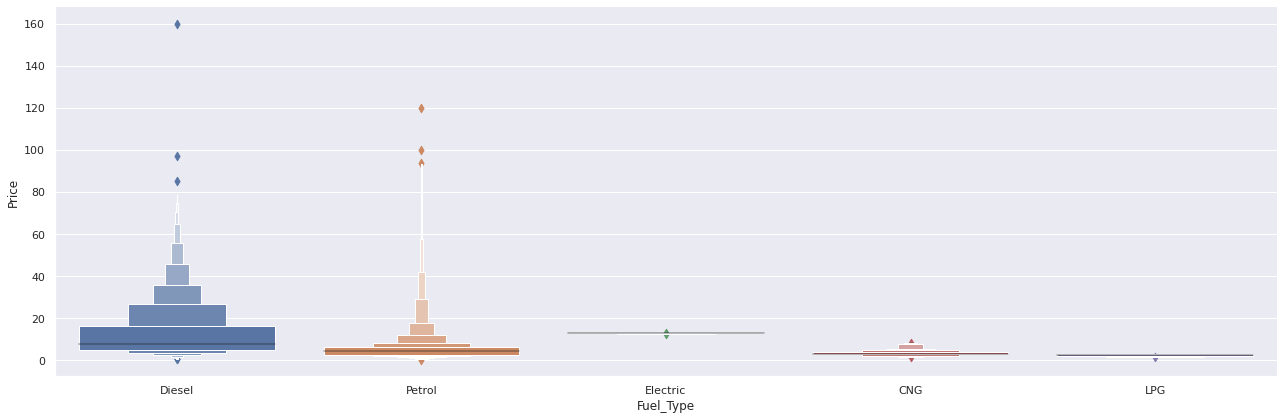

In [ ]:
#####working with fuel type#####

var = 'Fuel_Type'
x[var].value_counts()

sns.catplot(y='Price',x=var,data= x.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [ ]:

##again one hot encoding

Fuel_t = x[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0,0
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0


<function matplotlib.pyplot.show>

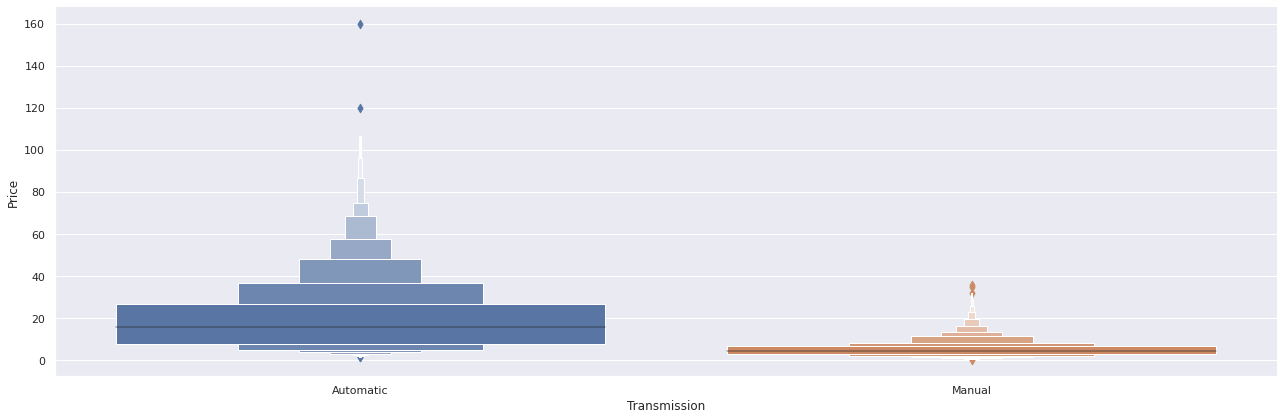

In [ ]:
####working with transmission#####

var = 'Transmission'
x[var].value_counts()

sns.catplot(y='Price',x=var,data= x.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [ ]:
##---onehot

Transmission = x[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


<function matplotlib.pyplot.show>

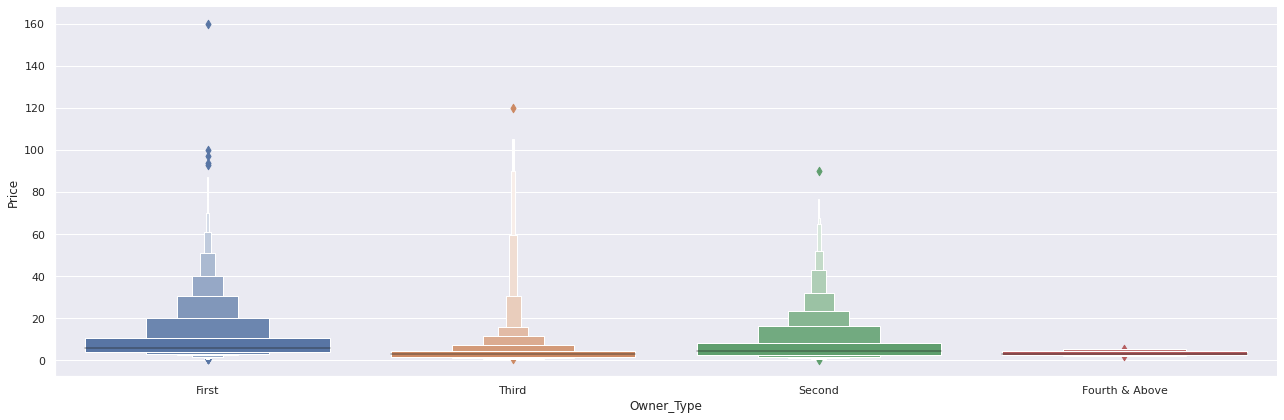

In [ ]:
#working with owner_type##########

var = 'Owner_Type'
x[var].value_counts()

sns.catplot(y='Price',x=var,data= x.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show


In [ ]:
#---label encoding here
x.replace({"First":1,"Second":2,"Third":3,"Fourth & Above":4},inplace=True)
x.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Mumbai,2010,72000,CNG,Manual,1,26.60,998,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968,140.80,5.0,17.74,Audi


In [ ]:
###working with company#####
var = 'Company'
x[var].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            395
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          269
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Lamborghini         1
Ambassador          1
Bentley             1
Name: Company, dtype: int64

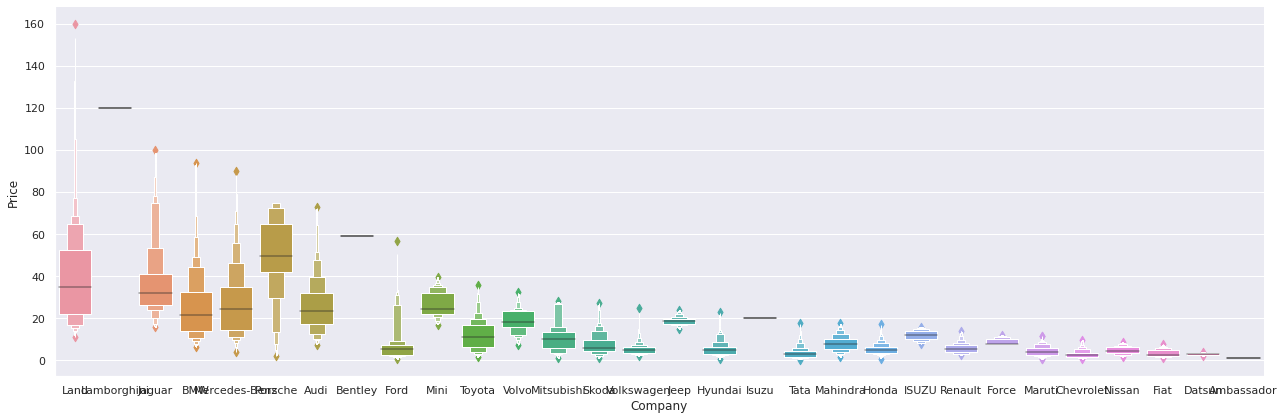

In [ ]:
#plot company vs price
sns.catplot(y='Price',x=var,data=x.sort_values('Price',ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [ ]:
##lets drop it
x = x.drop("Company", axis=1)

In [ ]:
final_x = pd.concat([x,Location,Fuel_t,Transmission], axis=1)

In [ ]:
final_x.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,26.60,998,58.16,5.0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582,126.20,5.0,12.50,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199,88.70,5.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248,88.76,7.0,6.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968,140.80,5.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
mileage_median = final_x['Mileage'].median()
final_x['Mileage'].fillna(mileage_median, inplace=True)

In [ ]:
final_x.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                  0
Price                  0
Location_Bangalore     0
Location_Chennai       0
Location_Coimbatore    0
Location_Delhi         0
Location_Hyderabad     0
Location_Jaipur        0
Location_Kochi         0
Location_Kolkata       0
Location_Mumbai        0
Location_Pune          0
Fuel_Type_Diesel       0
Fuel_Type_Electric     0
Fuel_Type_LPG          0
Fuel_Type_Petrol       0
Transmission_Manual    0
dtype: int64

In [ ]:

final_x.drop(["Location", "Fuel_Type", "Transmission"], axis=1, inplace=True)
final_x.head()


In [ ]:
final_x.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,26.60,998,58.16,5.0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2015,41000,1,19.67,1582,126.20,5.0,12.50,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
2,2011,46000,1,18.20,1199,88.70,5.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,20.77,1248,88.76,7.0,6.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,2013,40670,2,15.20,1968,140.80,5.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
y = final_x['Price']
final_x.drop("Price", axis=1)

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,26.60,998,58.16,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2015,41000,1,19.67,1582,126.20,5.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
2,2011,46000,1,18.20,1199,88.70,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,20.77,1248,88.76,7.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,2013,40670,2,15.20,1968,140.80,5.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,2014,27365,1,28.40,1248,74.00,5.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
5870,2015,100000,1,24.40,1120,71.00,5.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
5871,2012,55000,2,14.00,2498,112.00,8.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
5872,2013,46000,1,18.90,998,67.10,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1


In [ ]:
final_x.shape

(5874, 23)

In [ ]:
y.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

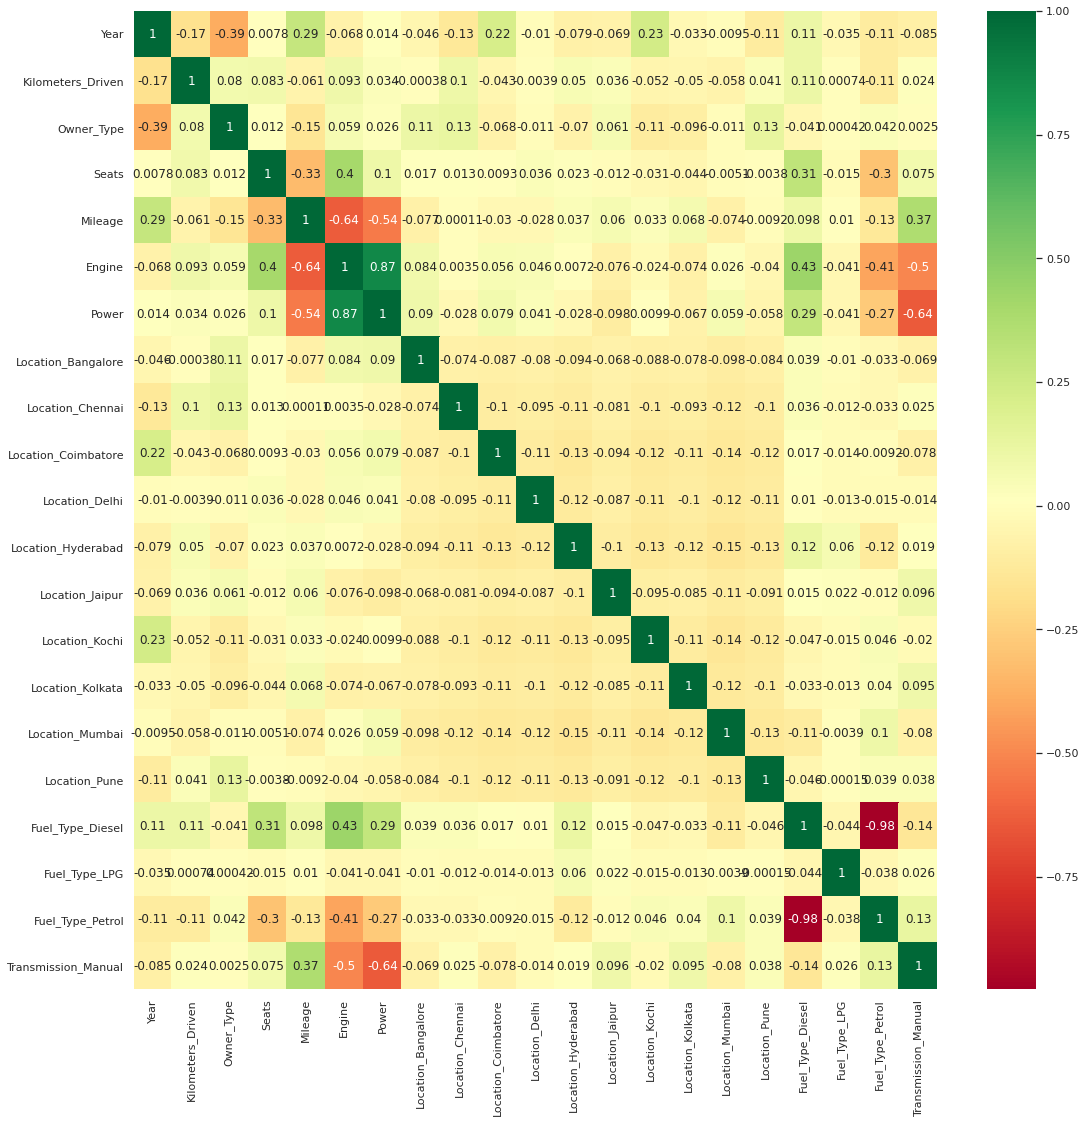

In [ ]:
##plotting heatmap
plt.figure(figsize=(18,18))
sns.heatmap(final_x.corr(),annot=True,cmap='RdYlGn')

plt.show()

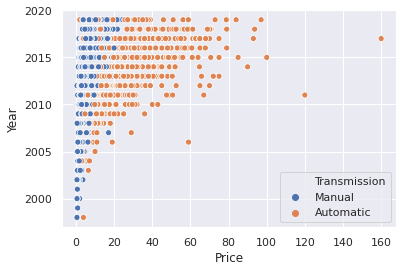

In [ ]:
sns.set()
g = sns.scatterplot(x="Price", y="Year", data=x, hue="Transmission")

In [ ]:
sns.set()
g = sns.scatterplot(x="Price", y="Kilometers_Driven", data=x, hue="Transmission")

AttributeError: ignored

In [ ]:
final_x.shape
final_x.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage,Engine,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,26.60,998,58.16,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,19.67,1582,126.20,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,18.20,1199,88.70,0,1,0,0,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,20.77,1248,88.76,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,15.20,1968,140.80,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
final_x = X = final_x.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage', 'Engine', 'Power', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
 

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(final_x,y)


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

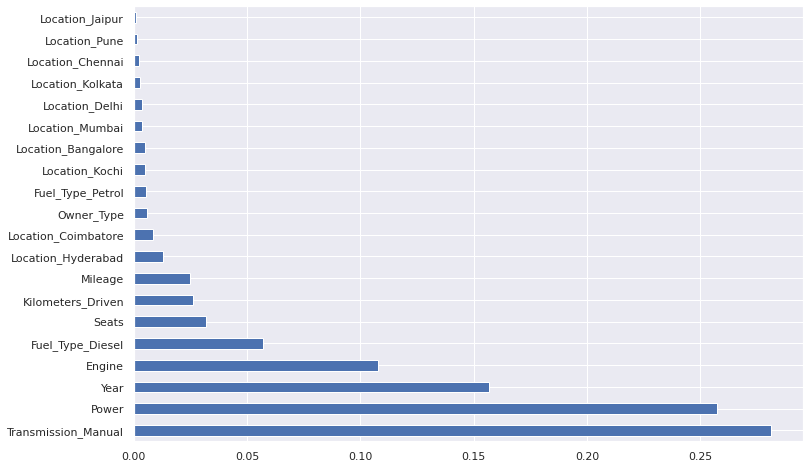

In [ ]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=final_x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
final_x.to_csv("model_data.csv")


In [ ]:
y.to_csv("y.csv")